In [1]:
import pandas as pd
import numpy as np

def read_crispr_data(filename):
	data = pd.read_csv(filename, low_memory=False)
	return data

data = read_crispr_data('GenomeCRISPR_full05112017.csv')

In [2]:
data.shape

(38473700, 16)

Trying to find publicate sequences that appear for all celllines, then to see if effects are different for them across cellines

In [3]:
dup_seqs = list(data[data.duplicated('sequence')]['sequence'])

In [5]:
len(dup_seqs)

37726529

In [6]:
dup_seqs_cl = data[data['sequence'].isin(dup_seqs)].groupby(['sequence']).nunique()['cellline'].reset_index()

In [7]:
dup_seqs_cl.shape

(680987, 2)

In [10]:
data.cellline.nunique()

420

In [11]:
seqs_all_cl = list(dup_seqs_cl[dup_seqs_cl['cellline'] == data.cellline.nunique()]['sequence'])

In [14]:
len(seqs_all_cl)

71728

In [13]:
seqs_all_cl = list(dup_seqs_cl[dup_seqs_cl['cellline'] >100]['sequence'])

Doing the same with pubmeds: trying to find a sequence that is in all pubmeds

In [16]:
dup_seqs_pubs = data[data['sequence'].isin(dup_seqs)].groupby(['sequence']).nunique()['pubmed'].reset_index()

In [17]:
dup_seqs_pubs.shape

(680987, 2)

In [19]:
seqs_all_pubs = list(dup_seqs_pubs[dup_seqs_pubs['pubmed'] == data.pubmed.nunique()]['sequence'])

In [27]:
seqs_all_pubs = list(dup_seqs_pubs[dup_seqs_pubs['pubmed'] >5]['sequence'])

In [28]:
len(seqs_all_pubs)

38767

In [ ]:
summary_by_pub_seq = data[data['sequence'].isin(seqs_all_cl)].groupby(['pubmed', 'sequence']).mean()['effect'].reset_index()

In [ ]:
29083409  27260156

In [30]:
top2pubs = data[data['pubmed'].isin(['29083409','27260156'])]

In [31]:
top2pubs.shape

(28845414, 16)

In [33]:
dup_seqs_t2 = list(top2pubs[top2pubs.duplicated('sequence')]['sequence'])

In [34]:
len(dup_seqs_t2)

28660456

In [35]:
dup_seqs_t22 = top2pubs[top2pubs['sequence'].isin(dup_seqs_t2)].groupby(['sequence']).nunique()['pubmed'].reset_index()

In [36]:
dup_seqs_t22.shape

(184958, 2)

In [37]:
seqs_all_2pubs = list(dup_seqs_t22[dup_seqs_t22['pubmed'] == 2]['sequence'])

In [38]:
len(seqs_all_2pubs)

5078

In [40]:
summary_by_pub_seq2 = top2pubs[top2pubs['sequence'].isin(seqs_all_2pubs)].groupby(['pubmed', 'sequence']).mean()['effect'].reset_index()

In [52]:
!sudo pip install matplotlib
#!pip install matplotlib.pyplot
import matplotlib.pyplot as plt
%matplotlib inline

The directory '/home/ol2205/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/ol2205/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.


In [55]:
summary_by_pub_seq2[['pubmed','effect']].plot(by='pubmed')

NameError: global name '_converter' is not defined

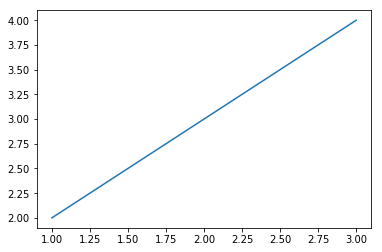

In [53]:
plt.plot([1,2,3],[2,3,4])
plt.show()

(array([ 687.,  528.,  774., 1103., 1585., 1795., 1691., 1236.,  610.,
         147.]),
 array([-9.03030303, -7.22727273, -5.42424242, -3.62121212, -1.81818182,
        -0.01515152,  1.78787879,  3.59090909,  5.39393939,  7.1969697 ,
         9.        ]),
 <a list of 10 Patch objects>)

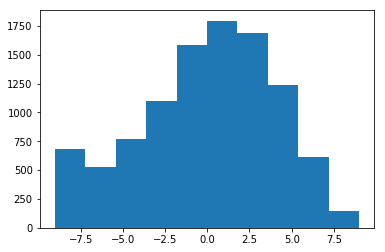

In [62]:
plt.hist(summary_by_pub_seq2['effect'])

(array([167., 109.,  93.,  94., 130., 145., 164., 247., 349., 414., 446.,
        483., 524., 479., 424., 336., 236., 148.,  65.,  25.]),
 array([-8.99099099, -8.11546547, -7.23993994, -6.36441441, -5.48888889,
        -4.61336336, -3.73783784, -2.86231231, -1.98678679, -1.11126126,
        -0.23573574,  0.63978979,  1.51531532,  2.39084084,  3.26636637,
         4.14189189,  5.01741742,  5.89294294,  6.76846847,  7.64399399,
         8.51951952]),
 <a list of 20 Patch objects>)

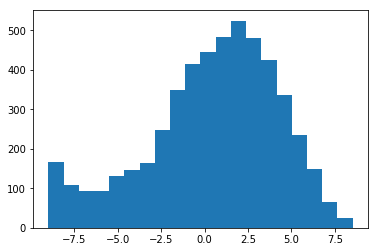

In [69]:
plt.hist(summary_by_pub_seq2[summary_by_pub_seq2['pubmed'] == 29083409]['effect'],bins=20)

(array([261., 148., 155., 180., 220., 271., 294., 354., 369., 405., 413.,
        398., 368., 318., 300., 226., 174., 130.,  69.,  25.]),
 array([-9.03030303, -8.12878788, -7.22727273, -6.32575758, -5.42424242,
        -4.52272727, -3.62121212, -2.71969697, -1.81818182, -0.91666667,
        -0.01515152,  0.88636364,  1.78787879,  2.68939394,  3.59090909,
         4.49242424,  5.39393939,  6.29545455,  7.1969697 ,  8.09848485,
         9.        ]),
 <a list of 20 Patch objects>)

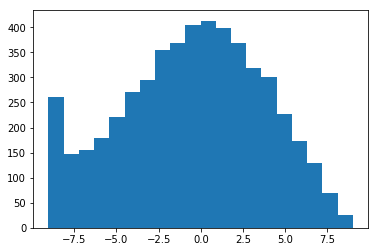

In [70]:
plt.hist(summary_by_pub_seq2[summary_by_pub_seq2['pubmed'] == 27260156]['effect'],bins=20)

In [74]:
summary_by_pub_seq2[summary_by_pub_seq2['pubmed'] == 27260156]['effect'].head()

0   -6.242424
1    8.151515
2   -3.060606
3   -2.363636
4    0.969697
Name: effect, dtype: float64

In [77]:
min(data['effect'])

-10.0

(array([5.240000e+02, 1.768616e+06, 1.768608e+06, 1.784183e+06,
        1.779137e+06, 1.771952e+06, 1.772334e+06, 1.755171e+06,
        1.755588e+06, 1.761006e+06, 3.805841e+06, 2.368782e+06,
        2.030232e+06, 2.066431e+06, 2.052011e+06, 2.030215e+06,
        2.030307e+06, 2.082074e+06, 2.044034e+06, 2.046165e+06]),
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 20 Patch objects>)

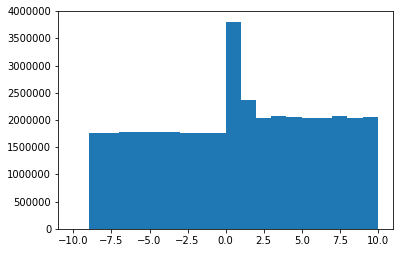

In [78]:
plt.hist(data['effect'].dropna(), bins=20)

In [ ]:
summary_by_cl_seq = data[data['sequence'].isin(seqs_all_cl)].groupby(['cellline', 'sequence']).mean()['effect'].reset_index()

In [ ]:
summary_by_cl_seq[['cellline','effect']].boxplot(by='cellline')

(array([1.30000e+01, 4.57900e+04, 4.57370e+04, 4.57560e+04, 4.57630e+04,
        4.57650e+04, 4.57600e+04, 4.57610e+04, 4.57650e+04, 4.57620e+04,
        1.08511e+05, 6.27330e+04, 6.27390e+04, 6.27370e+04, 6.27350e+04,
        6.27390e+04, 6.27370e+04, 6.27350e+04, 6.27370e+04, 6.27440e+04]),
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 20 Patch objects>)

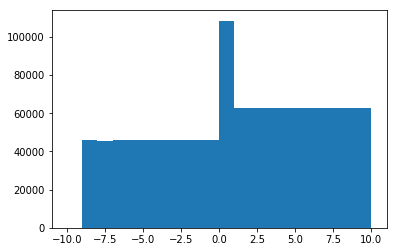

In [82]:
plt.hist(data[data['pubmed'] == 27760321]['effect'],bins=20)

(array([3.510000e+02, 1.171833e+06, 1.172056e+06, 1.171664e+06,
        1.171759e+06, 1.171764e+06, 1.171805e+06, 1.171816e+06,
        1.171875e+06, 1.171765e+06, 2.484609e+06, 1.312503e+06,
        1.312554e+06, 1.312478e+06, 1.312464e+06, 1.312606e+06,
        1.312511e+06, 1.312475e+06, 1.312534e+06, 1.312709e+06]),
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 20 Patch objects>)

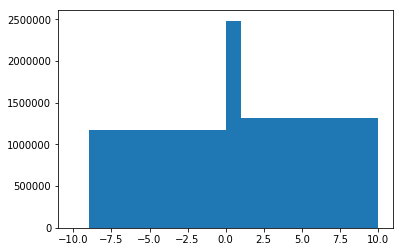

In [83]:
plt.hist(data[data['pubmed'] == 29083409]['effect'],bins=20)

In [ ]:


# check how many unique seqs
len(data['sequence'])
# 1048575
len(set(data['sequence']))
# 239895

data.groupby(['sequence', 'start']).mean()
# 255289

# get avg and std of effects
m = data.groupby(['sequence']).mean()['effect']
s = data.groupby(['sequence']).std()['effect']

# get number of seqs with only 1 repeat or same effect twice
len(np.where(s == 0)[0])
# 3531

np.max(s)
# 10

# distribution of effect classes
data.groupby(['effect']).count()['sequence']	

In [15]:
data.groupby(['effect']).count()['sequence'].to_csv("effectsize.csv")

In [6]:
data.shape
data.columns.values


array(['start', 'end', 'chr', 'strand', 'pubmed', 'cellline', 'condition',
       'sequence', 'symbol', 'ensg', 'log2fc', 'rc_initial', 'rc_final',
       'effect', 'cas', 'screentype'], dtype=object)

In [24]:
data.shape


(38473700, 16)

In [7]:
data.pubmed.unique()

array([ 26472758.,  26627737.,  24336569.,  24717434.,  25494202.,
        27260157.,  27013184.,  27453484.,  24336571.,  27383988.,
        26780180.,  27760321.,  27661255.,  27260156.,  27869803.,
              nan,  28162770.,    999999.,  28145866.,  28700943.,
        29083409.])

In [16]:
data.pubmed.unique().to_csv("unique_pubmeds.csv")

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [11]:
data.groupby(['pubmed']).count()

,start,end,chr,strand,cellline,condition,sequence,symbol,ensg,log2fc,rc_initial,rc_final,effect,cas,screentype
pubmed,,,,,,,,,,,,,,,
999999.0,169366,169366,169366,169366,169366,169366,169366,169366,169366,0,169366,169366,169366,169366,169366
24336569.0,134354,134354,134354,134354,134354,134354,134354,134354,134354,134354,134354,134354,134354,134354,134354
24336571.0,231172,231172,0,231172,231172,231172,231172,231172,231172,231172,231172,231172,231172,231172,231172
24717434.0,2547,2547,2547,2547,2547,2547,2547,2547,2547,2547,2547,2547,2547,2547,2547
25494202.0,190510,190510,190510,190510,190510,190510,190510,190510,190510,190510,190510,190510,190510,190510,190510
26472758.0,764472,764472,764472,764472,764472,764472,764472,764472,764472,764472,764472,764472,764472,764472,764472
26627737.0,1399355,1399355,1399355,1399355,1399355,1399355,1399355,1399355,1399355,1399355,1399355,1399355,1399355,1399355,1399355
26780180.0,971043,971043,971043,971043,971043,971043,971043,970653,970653,971043,971043,971043,971043,971043,971043
27013184.0,13777,13777,13777,13777,13777,13777,13777,13777,13777,13777,13777,13777,13777,13777,13777


In [17]:
data.groupby(['pubmed']).count().to_csv("count_by_pubmed.csv")

In [12]:
len(data.cellline.unique())

422

In [13]:
data.groupby(['cellline']).count()

,start,end,chr,strand,pubmed,condition,sequence,symbol,ensg,log2fc,rc_initial,rc_final,effect,cas,screentype
cellline,,,,,,,,,,,,,,,
5637,32768,32768,32768,32768,32768,32768,32768,32768,32768,32768,32768,32768,32768,32768,32768
143B,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607
293T,69046,69046,69046,69046,69046,69046,69046,69046,69046,69046,69046,69046,69046,69046,69046
42MGBA,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607
5637,41839,41839,41839,41839,41839,41839,41839,41839,41839,41839,41839,41839,41839,41839,41839
59M,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607
639V,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607
647V,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607,74607
697,5841,5841,5829,5841,5841,5841,5841,5841,5841,5841,5841,5841,5841,5841,5841


In [18]:
data.groupby(['cellline']).count().to_csv("count_by_celline.csv")

In [19]:
data.groupby(['pubmed','cellline']).count().to_csv("count_by_celline_pubmed.csv")

In [10]:
data.groupby(['sequence','symbol']).size().reset_index().rename(columns={0:'count'})

,sequence,symbol,count
0,AAAAAAAAAAAGGGGGGTTCTGG,GSDMB,2
1,AAAAAAAAAAAGTCGTACTTGGG,MIR3129,36
2,AAAAAAAAAAGAGCACGATGAGG,OLR1,2
3,AAAAAAAAAATTCCACCCCCTGG,SLC2A9,2
4,AAAAAAAAAATTGCCGGGCGAGG,CTDP1,4
5,AAAAAAAAAATTGCCGGGCGCGG,DDX51,2
6,AAAAAAAAAATTGCCGGGCGTAG,SCN1B,2
7,AAAAAAAAAATTGCCGGGCGTGG,HLA-DQA1,4
8,AAAAAAAAAATTGCCGGGCGTGG,HLA-DQA2,2
9,AAAAAAAAAATTGCCGGGCGTGG,MYBPHL,2


In [20]:
print (data[data.duplicated(['sequence','symbol'], keep=False)].shape)

print (data[data.duplicated(['sequence','celline'], keep=False)].shape)

print (data[data.duplicated(['sequence','pubmed'], keep=False)].shape)

print (data[data.duplicated(['sequence','celline', 'symbol'], keep=False)].shape)

(38405227, 16)
(38407517, 16)
(38156308, 16)
(38405227, 16)


In [ ]:
grouped_data = data.groupby(['sequence','cellline','pubmed']).median()['effect']

In [ ]:
plt.hist(grouped_data[grouped_data['pubmed'] == 29083409]['effect'],bins=20)

In [28]:
data.groupby(['sequence','cellline','pubmed']).mean()['effect'].to_csv("mean_effect_by_seq_celline_pub.csv")

In [ ]:
data.groupby(['sequence','cellline','pubmed']).range()['effect'].to_csv("count_effect_by_seq_celline_pub.csv")

In [2]:
sm = data.sample(1000)

NameError: name 'data' is not defined

In [31]:
sm.groupby('celline', 'sequence').mean().reset_index()

ValueError: No axis named sequence for object type <class 'pandas.core.frame.DataFrame'>

In [33]:
sm[sm.duplicated('sequence')]

,start,end,chr,strand,pubmed,cellline,condition,sequence,symbol,ensg,log2fc,rc_initial,rc_final,effect,cas,screentype
2249491,86890067.0,86890090.0,10,+,27260157.0,MKN45,viability,AATCTGGATAGTATGCTTCATGG,BMPR1A,ENSG00000107779,-0.407826,[],[],-6.0,hSpCas9,negative selection
2410703,86890067.0,86890090.0,10,+,27260157.0,SF268,viability,AATCTGGATAGTATGCTTCATGG,BMPR1A,ENSG00000107779,0.428662,[],[],7.0,hSpCas9,negative selection
2448566,86890067.0,86890090.0,10,+,27260157.0,SF268,viability,AATCTGGATAGTATGCTTCATGG,BMPR1A,ENSG00000107779,0.193319,[],[],3.0,hSpCas9,negative selection
2138681,86890067.0,86890090.0,10,+,27260157.0,DLD1,viability,AATCTGGATAGTATGCTTCATGG,BMPR1A,ENSG00000107779,0.415941,[],[],7.0,hSpCas9,negative selection
2109405,86890067.0,86890090.0,10,+,27260157.0,DLD1,viability,AATCTGGATAGTATGCTTCATGG,BMPR1A,ENSG00000107779,0.043336,[],[],3.0,hSpCas9,negative selection
17969072,9267768.0,9267791.0,4,-,29083409.0,EFO21,viability,CAGGAGCCAAATCATCACAGAGG,USP17L22,ENSG00000248933,-0.648133,[60324],"[29940,17122,27626]",-6.0,hSpCas9,negative selection
15216729,69013523.0,69013546.0,2,-,29083409.0,CAKI2,viability,GCCACTGGAAGCCGATGCCGAGG,ANTXR1,ENSG00000169604,-0.174888,[750],"[58,78]",-5.0,hSpCas9,negative selection
16123757,120985461.0,120985484.0,X,+,29083409.0,CHAGOK1,viability,TGCTCCCTCCTGGCTTACCGGGG,CT47A1,ENSG00000236371,0.094042,[187201],"[21979,21009]",1.0,hSpCas9,negative selection
21885340,170722723.0,170722746.0,5,-,29083409.0,HT1376,viability,TCTCAATAAAATCGACAGAGCGG,KCNIP1,ENSG00000182132,-0.256784,[702],"[82,30]",-5.0,hSpCas9,negative selection


In [74]:
dup_seq = list(sm[sm.duplicated('sequence')]['sequence'])

In [102]:
sm[sm['sequence'].isin(dup_seq)].groupby(['sequence']).nunique()['cellline'] > 2

sequence
AATCTGGATAGTATGCTTCATGG     True
CAGGAGCCAAATCATCACAGAGG    False
GCCACTGGAAGCCGATGCCGAGG    False
TCTCAATAAAATCGACAGAGCGG    False
TGCTCCCTCCTGGCTTACCGGGG    False
Name: cellline, dtype: bool

In [107]:
x = sm[sm['sequence'].isin(dup_seq)].groupby(['sequence']).nunique()['cellline'].reset_index()

In [108]:
x

,sequence,cellline
0,AATCTGGATAGTATGCTTCATGG,3
1,CAGGAGCCAAATCATCACAGAGG,2
2,GCCACTGGAAGCCGATGCCGAGG,2
3,TCTCAATAAAATCGACAGAGCGG,2
4,TGCTCCCTCCTGGCTTACCGGGG,2


In [114]:
seqs = list(x[x['cellline'] > 1]['sequence'])

In [115]:
seqs

['AATCTGGATAGTATGCTTCATGG',
 'CAGGAGCCAAATCATCACAGAGG',
 'GCCACTGGAAGCCGATGCCGAGG',
 'TCTCAATAAAATCGACAGAGCGG',
 'TGCTCCCTCCTGGCTTACCGGGG']

In [120]:
x2 = sm[sm['sequence'].isin(seqs)].groupby(['cellline', 'sequence']).mean()['effect'].reset_index()

In [121]:
x2

,cellline,sequence,effect
0,A375,GCCACTGGAAGCCGATGCCGAGG,-4.0
1,CAKI2,GCCACTGGAAGCCGATGCCGAGG,-5.0
2,CAOV3,TCTCAATAAAATCGACAGAGCGG,7.0
3,CHAGOK1,TGCTCCCTCCTGGCTTACCGGGG,1.0
4,DLD1,AATCTGGATAGTATGCTTCATGG,5.0
5,EFO21,CAGGAGCCAAATCATCACAGAGG,-6.0
6,HT1376,TCTCAATAAAATCGACAGAGCGG,-5.0
7,MKN45,AATCTGGATAGTATGCTTCATGG,-1.0
8,NCIH1693,CAGGAGCCAAATCATCACAGAGG,-5.0
9,SF268,AATCTGGATAGTATGCTTCATGG,5.0


In [157]:
%matplotlib inline  

In [1]:
x2[['cellline','effect']].boxplot(by='cellline')

NameError: name 'x2' is not defined

In [165]:
x2[['cellline','effect']].plot.scatter(y='cellline', x='effect')

ValueError: scatter requires y column to be numeric

In [101]:
sm[sm.sequence=='GCCACTGGAAGCCGATGCCGAGG']

,start,end,chr,strand,pubmed,cellline,condition,sequence,symbol,ensg,log2fc,rc_initial,rc_final,effect,cas,screentype
37973456,69013523.0,69013546.0,2,-,26780180.0,A375,viability (Avana lentiGuide),GCCACTGGAAGCCGATGCCGAGG,ANTXR1,ENSG00000169604,-0.673297,[],[],-4.0,hSpCas9,negative selection
15216729,69013523.0,69013546.0,2,-,29083409.0,CAKI2,viability,GCCACTGGAAGCCGATGCCGAGG,ANTXR1,ENSG00000169604,-0.174888,[750],"[58,78]",-5.0,hSpCas9,negative selection


In [57]:
sm[sm.duplicated('sequence')].groupby(['cellline', 'sequence']).count()

,,start,end,chr,strand,pubmed,condition,symbol,ensg,log2fc,rc_initial,rc_final,effect,cas,screentype
cellline,sequence,,,,,,,,,,,,,,
CAKI2,GCCACTGGAAGCCGATGCCGAGG,1,1,1,1,1,1,1,1,1,1,1,1,1,1
CHAGOK1,TGCTCCCTCCTGGCTTACCGGGG,1,1,1,1,1,1,1,1,1,1,1,1,1,1
DLD1,AATCTGGATAGTATGCTTCATGG,2,2,2,2,2,2,2,2,2,2,2,2,2,2
EFO21,CAGGAGCCAAATCATCACAGAGG,1,1,1,1,1,1,1,1,1,1,1,1,1,1
HT1376,TCTCAATAAAATCGACAGAGCGG,1,1,1,1,1,1,1,1,1,1,1,1,1,1
MKN45,AATCTGGATAGTATGCTTCATGG,1,1,1,1,1,1,1,1,1,1,1,1,1,1
SF268,AATCTGGATAGTATGCTTCATGG,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [38]:
len(sm.cellline.unique())

338

In [45]:
(sm[sm.duplicated('sequence')].groupby(['cellline', 'sequence']).count()>100).shape

(7, 14)

In [66]:
sm[sm.duplicated('sequence')].groupby('cellline').count()

,start,end,chr,strand,pubmed,condition,sequence,symbol,ensg,log2fc,rc_initial,rc_final,effect,cas,screentype
cellline,,,,,,,,,,,,,,,
CAKI2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
CHAGOK1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
DLD1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
EFO21,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
HT1376,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
MKN45,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
SF268,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [65]:
sm[sm.duplicated('sequence')]

,start,end,chr,strand,pubmed,cellline,condition,sequence,symbol,ensg,log2fc,rc_initial,rc_final,effect,cas,screentype
2249491,86890067.0,86890090.0,10,+,27260157.0,MKN45,viability,AATCTGGATAGTATGCTTCATGG,BMPR1A,ENSG00000107779,-0.407826,[],[],-6.0,hSpCas9,negative selection
2410703,86890067.0,86890090.0,10,+,27260157.0,SF268,viability,AATCTGGATAGTATGCTTCATGG,BMPR1A,ENSG00000107779,0.428662,[],[],7.0,hSpCas9,negative selection
2448566,86890067.0,86890090.0,10,+,27260157.0,SF268,viability,AATCTGGATAGTATGCTTCATGG,BMPR1A,ENSG00000107779,0.193319,[],[],3.0,hSpCas9,negative selection
2138681,86890067.0,86890090.0,10,+,27260157.0,DLD1,viability,AATCTGGATAGTATGCTTCATGG,BMPR1A,ENSG00000107779,0.415941,[],[],7.0,hSpCas9,negative selection
2109405,86890067.0,86890090.0,10,+,27260157.0,DLD1,viability,AATCTGGATAGTATGCTTCATGG,BMPR1A,ENSG00000107779,0.043336,[],[],3.0,hSpCas9,negative selection
17969072,9267768.0,9267791.0,4,-,29083409.0,EFO21,viability,CAGGAGCCAAATCATCACAGAGG,USP17L22,ENSG00000248933,-0.648133,[60324],"[29940,17122,27626]",-6.0,hSpCas9,negative selection
15216729,69013523.0,69013546.0,2,-,29083409.0,CAKI2,viability,GCCACTGGAAGCCGATGCCGAGG,ANTXR1,ENSG00000169604,-0.174888,[750],"[58,78]",-5.0,hSpCas9,negative selection
16123757,120985461.0,120985484.0,X,+,29083409.0,CHAGOK1,viability,TGCTCCCTCCTGGCTTACCGGGG,CT47A1,ENSG00000236371,0.094042,[187201],"[21979,21009]",1.0,hSpCas9,negative selection
21885340,170722723.0,170722746.0,5,-,29083409.0,HT1376,viability,TCTCAATAAAATCGACAGAGCGG,KCNIP1,ENSG00000182132,-0.256784,[702],"[82,30]",-5.0,hSpCas9,negative selection


In [54]:
sm.loc[sm.groupby(['sequence']).count()['effect']>1]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [62]:
sm.duplicated('sequence')

21622108    False
7079714     False
35250226    False
2345392     False
25826227    False
23898675    False
7206366     False
36200931    False
38140308    False
31103874    False
198964      False
36100075    False
722553      False
20933475    False
26075984    False
27568598    False
5701393     False
985652      False
20527228    False
13718743    False
14844078    False
3684201     False
12816923    False
24610145    False
32408908    False
18873966    False
12718069    False
23473534    False
985182      False
38103151    False
            ...  
22346774    False
33037664    False
25416004    False
9853817     False
31498667    False
37770865    False
19730142    False
25816055    False
263820      False
20776956    False
24366106    False
34079809    False
1841585     False
2429353     False
19482595    False
31974359    False
20265088    False
550912      False
7813712     False
32742796    False
10803173    False
21885340     True
7584298     False
37826168    False
3401482   